In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25dedea3b00>,
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716}

In [11]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25dedf20588>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
conn = engine.connect()
lastdate = pd.read_sql("SELECT MAX(date) FROM measurement", conn)
#2017-08-23
yearago = dt.datetime(2016, 8, 23)  

# Perform a query to retrieve the data and precipitation scores
sql = "SELECT date, prcp FROM measurement WHERE date > '2016-08-23'"

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
rain = pd.read_sql(sql, conn)
rain.sort_values(by=['date'], ascending=True)
rain.fillna(0, inplace=True)
rain.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


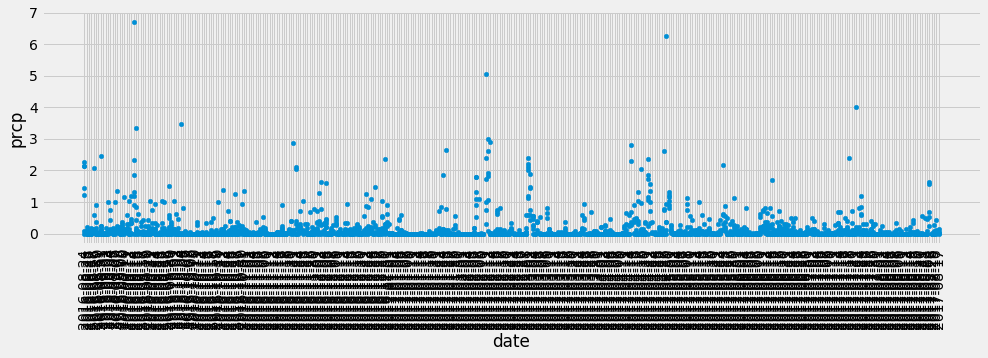

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
rain.plot(x='date', y='prcp', kind='scatter', rot=90, figsize=(15,4));



In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain.describe()


,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset?
conn = engine.connect()
#stations = pd.read_sql("SELECT DISTINCT station FROM measurement", conn)
stations = pd.read_sql("SELECT count(DISTINCT station) AS 'Num_Stations' FROM measurement", conn)
print(stations)

   Num_Stations
0             9


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = pd.read_sql("SELECT station, count(*) as 'Measurements' FROM measurement GROUP BY station ORDER BY 2 DESC", conn)
print(station_activity)

       station  Measurements
0  USC00519281          2772
1  USC00519397          2724
2  USC00513117          2709
3  USC00519523          2669
4  USC00516128          2612
5  USC00514830          2202
6  USC00511918          1979
7  USC00517948          1372
8  USC00518838           511


In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_USC00519281 = pd.read_sql("SELECT AVG(a.tobs) as 'AvgTemp', MIN(a.tobs) as 'MinTemp', MAX(a.tobs) as 'MaxTemp' FROM measurement a WHERE a.station='USC00519281' GROUP BY a.station", conn)
print(station_USC00519281)

     AvgTemp  MinTemp  MaxTemp
0  71.663781     54.0     85.0


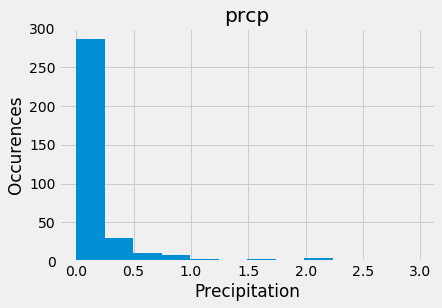

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sql = "SELECT date, prcp FROM measurement WHERE date > '2016-08-23' AND station='USC00519281'"
USC00519281_df = pd.read_sql(sql, conn)
USC00519281_df.sort_values(by=['date'], ascending=True)
USC00519281_df.dropna()
USC00519281_df.set_index('date')

USC00519281_df.hist(column='prcp', bins=12)
plt.xlabel('Precipitation')
plt.ylabel('Occurences')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
